In [2]:
import numpy as np
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings('ignore')

/Users/yamadayuuta/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yamadayuuta/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def r_calc(test,pred):
    n=len(test)
    ave_test = np.sum(test)/n
    ave_pred = np.sum(pred)/n
    a=0
    b=0
    c=0
    for i in range(0,len(test)):
        a += (test[i] - ave_test)*(pred[i] - ave_pred)
        b += (test[i] - ave_test)**2
        c += (pred[i] - ave_pred)**2
    
    a2 = a/n
    b2 = (b/n)**0.5
    c2 = (c/n)**0.5
    return a2/(b2*c2)

In [3]:
def feature_std_delite(x,out_index):  
    new_index = np.array(range(len(x[0])))
    index = np.array(range(len(x[0])-len(out_index)))
    for i in range(0,len(out_index)):
        new_index = np.delete(new_index, out_index[i]-i)
   
    new_x = np.zeros((len(x),len(x[0])-len(out_index)))
    for k in range(0,len(new_x)):      
        for i in range(0,len(new_x[0])):
            new_x[k][index[i]] = x[k][new_index[i]]
    return new_x 

In [4]:
def feature_select1(x):
    out_index=[] 
    for i in range(0,len(x[0])):
        flag=0
        value = x[0][i]
        for j in range(0,len(x)):
            if(value == x[j][i]):
                value = x[j][i]                
            else:
                if(flag!=1):
                    flag=1
        if(flag!=1):
            out_index.append(i)
        
    new_index = np.array(range(len(x[0])))
    index = np.array(range(len(x[0])-len(out_index)))
    for i in range(0,len(out_index)):
        new_index = np.delete(new_index, out_index[i]-i)
   
    new_x = np.zeros((len(x),len(x[0])-len(out_index)))
    for k in range(0,len(new_x)):      
        for i in range(0,len(new_x[0])):
            new_x[k][index[i]] = x[k][new_index[i]]
    return new_x ,out_index

In [5]:
def nfeature_select(x,out_index):
    new_index = np.array(range(len(x[0])))
    index = np.array(range(len(x[0])-len(out_index)))
    for i in range(0,len(out_index)):
        new_index = np.delete(new_index, out_index[i]-i)
   
    new_x = np.zeros((len(x),len(x[0])-len(out_index)))
    for k in range(0,len(new_x)):      
        for i in range(0,len(new_x[0])):
            new_x[k][index[i]] = x[k][new_index[i]]
    return new_x 

In [6]:
def nfeature(x,oi):
    new_index = np.array(range(len(x)))
    for i in range(0,len(oi)):
        new_index = np.delete(new_index, oi[i]-i)
   
    new_x = []
    for i in range(0,len(new_index)):      
        new_x.append(x[new_index[i]])
    return new_x

In [1]:
def ave(lst,interval):
    ave_lst=np.zeros((len(lst),int(len(lst[0])/6)))
    
    for i in range(0,len(lst)):
        for j in range(0,int(len(lst[0])/6)):
            ave_lst[i][j] = (sum(lst[i][j::interval])/6)
    return ave_lst

In [13]:
def rank_backsort(x):
    y = np.sort(x)
    y = y[::-1]
    z = np.zeros(len(x))
    
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            if(x[i] == y[j]):
                z[i] = j+1
                break
    return z

# まずは特徴量を平均して分散0を除去

In [4]:
#まずは平均をとる。そのあと、分散0の特徴量indexを取得する。
data = np.loadtxt("furukawaの6残基*207特徴量_名前なし.csv",delimiter=",",dtype=float)
feature = data[:,0:1236]
train_label = data[:,-1]

ave_feature = ave(feature,206)
file = open("furukawa_残基毎_206次元_名前付き.csv","w")
name = np.loadtxt("特徴量_名前一覧.csv",delimiter=",",dtype=str)
for i in range(0,len(name)):
    file.write(an_feature[i])
    file.write(",")
file.write("logPapp\n")
a = 0
for i in range(0,393):
    for j in range(0,len(name)):
        file.write(str(ave_feature[i][j]))
        file.write(",")
    file.write(str(train_label[i]))
    file.write("\n")
file.close()


out_index=[]
train_feature,out_index = feature_select1(ave_feature)

NameError: name 'an_feature' is not defined

In [14]:
#分散0のものを除去。
file = open("furukawaの6残基平均206次元_分散0除去_名前付き.csv","w")
name = np.loadtxt("特徴量_名前一覧.csv",delimiter=",",dtype=str)
#分散0をここで除去
an_feature = nfeature(name,out_index)

for i in range(0,len(an_feature)):
    file.write(an_feature[i])
    file.write(",")
file.write("logPapp\n")
a = 0
for i in range(0,393):
    for j in range(0,len(an_feature)):
        file.write(str(train_feature[i][j]))
        file.write(",")
    file.write(str(train_label[i]))
    file.write("\n")
file.close()

In [6]:
data = np.loadtxt("wangの6残基*207特徴量_名前なし.csv",delimiter=",",dtype=float)
feature = data[:,0:1236]
test_label = data[:,-1]

ave_feature = ave(feature,206)


file = open("WANGZANKI.csv","w")
name = np.loadtxt("特徴量_名前一覧.csv",delimiter=",",dtype=str)


for i in range(0,len(name)):
    file.write(name[i])
    file.write(",")
file.write("logPapp\n")

for i in range(37):
    for j in range(0,len(name)):
        file.write(str(ave_feature[i][j]))
        file.write(",")
    file.write(str(test_label[i]))
    file.write("\n")
file.close()

In [11]:
data=np.loadtxt("WANGZANKI.csv",delimiter=",",dtype=str)
fe=data[3:5,0:206]
for i in range(len(fe[0])):
    fe[0][i]=float(fe[0][i])
for i in range(len(fe[0])):
    fe[1][i]=float(fe[1][i])
    
for i in range(len(fe[0])):
    print(fe[0][i]-fe[1][i])

TypeError: unsupported operand type(s) for -: 'numpy.str_' and 'numpy.str_'

# データセットができたから、特徴量の選択に移る
## まずはRandomForestのパラメータを探索

In [8]:
tuned_parameters = {'n_estimators'  : [10, 100, 1000, 10000], 'max_features' : ['auto','sqrt','log2']}

In [10]:
data = np.loadtxt('furukawaの6残基平均206次元_分散0除去_名前なし.csv', delimiter=',', dtype=float)
train_feature = data[:,0:164]
train_label = data[:,-1]

grid = GridSearchCV(RandomForestRegressor(),tuned_parameters,cv=5,scoring='r2')
grid.fit(train_feature,train_label)
print(grid.best_params_)

{'max_features': 'auto', 'n_estimators': 1000}


## RandomForestで優先度を調べる

In [20]:
data = np.loadtxt('furukawaの6残基平均206次元_分散0除去_名前なし.csv', delimiter=',', dtype=float)
feature = data[:,0:164]
label = data[:,-1]

importance=np.zeros(164)
regr = RandomForestRegressor(n_estimators=1000,max_features='auto')
kf = KFold(n_splits = 5, shuffle = True)
for train_index, test_index in kf.split(feature):
    train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]
    regr.fit(train_feature,train_label)
    for j in range(len(importance)):
            importance[j] = importance[j] + regr.feature_importances_[j]


In [21]:
rank_index = rank_backsort(importance)

## 調べ終えたら、rank順にデータセットを並び替える

In [22]:
file=open("furukawa_残基毎_標準化なし_rank順_名前付き.csv","w")
data = np.loadtxt('furukawaの6残基平均206次元_分散0除去_名前付き.csv', delimiter=',', dtype=str)
feature=data[:,0:164]
label = data[:,-1]

for i in range(394):
    for j in range(1,165):
            for k in range(164):
                if(j==rank_index[k]):
                    file.write(feature[i][k])
                    file.write(",")
    file.write(label[i])
    file.write("\n")
file.close()

In [23]:
file=open("wang_残基毎_標準化なし_rank順_名前付き.csv","w")
data = np.loadtxt('wangの6残基平均206次元_分散0除去_名前付き.csv', delimiter=',', dtype=str)
feature=data[:,0:164]
label = data[:,-1]

for i in range(38):
    for j in range(1,165):
            for k in range(164):
                if(j==rank_index[k]):
                    file.write(feature[i][k])
                    file.write(",")
    file.write(label[i])
    file.write("\n")
file.close()

## rank5個ずつ増やして精度の変化を確認
### まずは5個

In [47]:
tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]

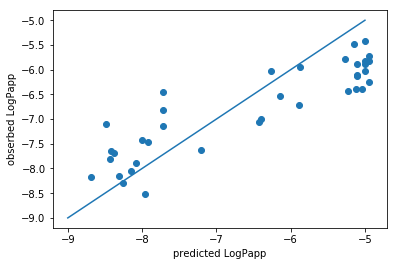

SVR: r2 0.219872, RMSE 0.784773, r 0.889314


In [407]:
x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed LogPapp')
plt.xlabel('predicted LogPapp')
plt.show()
print ("SVR: r2 %f, RMSE %f, r %f" % (R2, rmse, r))

### 10個

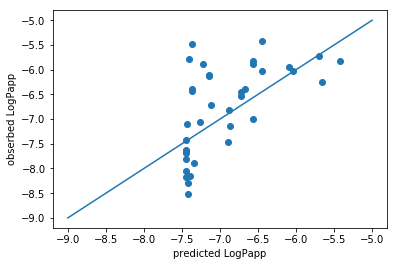

SVR: r2 0.323306, RMSE 0.730899, r 0.596649


In [299]:
x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed LogPapp')
plt.xlabel('predicted LogPapp')
plt.show()
print ("SVR: r2 %f, RMSE %f, r %f" % (R2, rmse, r))

### 15個

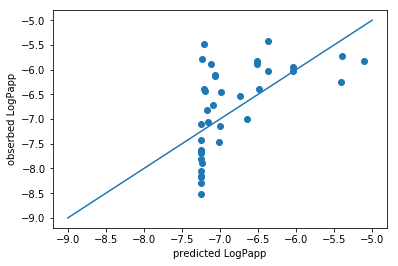

SVR: r2 0.309791, RMSE 0.738162, r 0.566132


In [306]:
x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed LogPapp')
plt.xlabel('predicted LogPapp')
plt.show()
print ("SVR: r2 %f, RMSE %f, r %f" % (R2, rmse, r))

### 20個

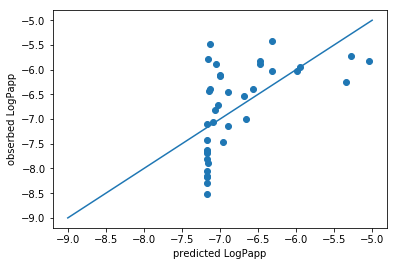

SVR: r2 0.307268, RMSE 0.739510, r 0.560687


In [313]:
x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed LogPapp')
plt.xlabel('predicted LogPapp')
plt.show()
print ("SVR: r2 %f, RMSE %f, r %f" % (R2, rmse, r))

### 25個

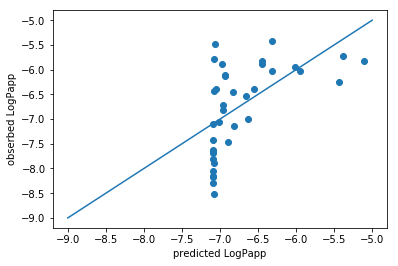

SVR: r2 0.306588, RMSE 0.739873, r 0.558475


In [320]:
x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed LogPapp')
plt.xlabel('predicted LogPapp')
plt.show()
print ("SVR: r2 %f, RMSE %f, r %f" % (R2, rmse, r))

### 30個

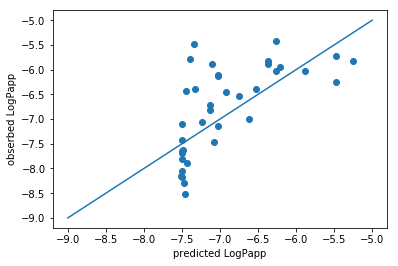

SVR: r2 0.389166, RMSE 0.694421, r 0.649698


In [327]:
x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed LogPapp')
plt.xlabel('predicted LogPapp')
plt.show()
print ("SVR: r2 %f, RMSE %f, r %f" % (R2, rmse, r))

### 40個以降

In [51]:
train_data = np.loadtxt("furukawa_分散0残基平均rank順_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:80]
train_label=train_data[:,-1]

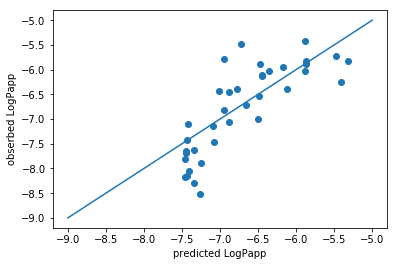

SVR: r2 0.630875, RMSE 0.539819, r 0.802520


In [57]:
x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed LogPapp')
plt.xlabel('predicted LogPapp')
plt.show()
print ("SVR: r2 %f, RMSE %f, r %f" % (R2, rmse, r))

### 全部

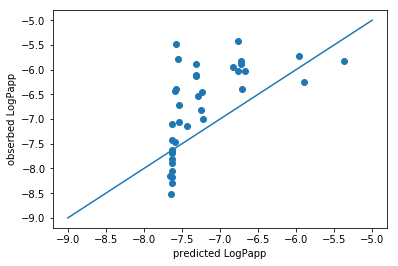

SVR: r2 0.126656, RMSE 0.830336, r 0.610286


In [334]:
x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed LogPapp')
plt.xlabel('predicted LogPapp')
plt.show()
print ("SVR: r2 %f, RMSE %f, r %f" % (R2, rmse, r))

### 標準偏差に100倍以上差があるものを除去

In [3]:
train_data = np.loadtxt("furukawa_分散0残基平均rank順_名前なし.csv",delimiter=",",dtype=float)
test_data = np.loadtxt('wang_分散0残基平均rank順_名前なし.csv', delimiter=',', dtype=float)

for i in range(164):
    train = train_data[:,i]
    test = test_data[:,i]
    
    train_ave=sum(train)/len(train)
    test_ave=sum(test)/len(test)
    
    for j in range(len(train)):
        train_std=(((train_ave - train[j])**2)/len(train))**0.5
    for j in range(len(test)):
        test_std=(((test_ave - test[j])**2)/len(test))**0.5
    
    if(train_std/test_std > 100 or train_std/test_std<0.01):
        print("feature_rank_%d"% i)
    

feature_rank_53
feature_rank_55
feature_rank_61
feature_rank_111
feature_rank_133
feature_rank_134
feature_rank_147
feature_rank_149
feature_rank_152
feature_rank_153
feature_rank_157
feature_rank_159
feature_rank_161
feature_rank_163


In [4]:
oi=[53,55,61,111,133,134,147,149,152,153,157,159,161,163]

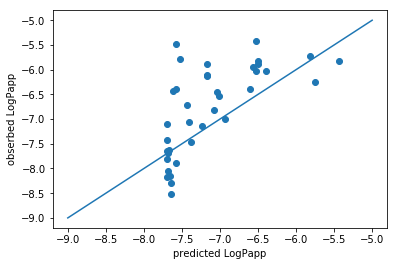

SVR: r2 0.280666, RMSE 0.753575, r 0.660887


In [22]:
train_data = np.loadtxt("furukawa_分散0残基平均rank順_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:164]
train_label=train_data[:,-1]
test_data = np.loadtxt('wang_分散0残基平均rank順_名前なし.csv', delimiter=',', dtype=float)
test_feature = test_data[:, 0:164]
test_label = test_data[:, -1] 

train_feature = feature_std_delite(train_feature,oi)
test_feature = feature_std_delite(test_feature,oi)

scaler = StandardScaler()
scaler.fit(train_feature)
train_feature = scaler.transform(train_feature)
test_feature = scaler.transform(test_feature)

clf = SVR(C=8,kernel='rbf',gamma=0.001953125,epsilon=0.1)
clf.fit(train_feature, train_label)
pred = clf.predict(test_feature)

R2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5
r = r_calc(test_label,pred)

x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed LogPapp')
plt.xlabel('predicted LogPapp')
plt.show()
print ("SVR: r2 %f, RMSE %f, r %f" % (R2, rmse, r))

In [45]:
def prediction(x):
    train_data = np.loadtxt("furukawa_分散0残基平均rank順_名前なし.csv",delimiter=",",dtype=float)
    train_feature=train_data[:,0:x]
    train_label=train_data[:,-1]
    
    test_data = np.loadtxt('wang_分散0残基平均rank順_名前なし.csv', delimiter=',', dtype=float)
    test_feature = test_data[:, 0:x]
    test_label = test_data[:, -1] 

    scaler = StandardScaler()
    scaler.fit(train_feature)
    train_feature = scaler.transform(train_feature)
    test_feature = scaler.transform(test_feature)

    grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
    grid.fit(train_feature,train_label)
    
    clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
    clf.fit(train_feature, train_label)
    pred = clf.predict(test_feature)

    R2 = r2_score(test_label,pred)
    rmse = (mean_squared_error(test_label,pred))**0.5
    r = r_calc(test_label,pred)

    x = np.linspace(-9,-5)  
    y = x              
    plt.plot(x,y)      

    y1 = pred
    y2 = test_label
    plt.scatter(y1,y2)

    plt.ylabel('obserbed LogPapp')
    plt.xlabel('predicted LogPapp')
    plt.show()
    print ("SVR: r2 %f, RMSE %f, r %f" % (R2, rmse, r))

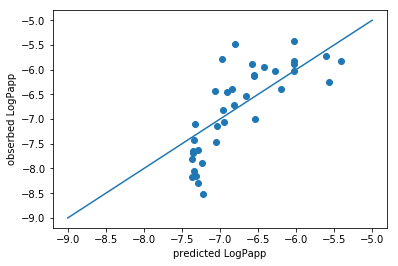

SVR: r2 0.583613, RMSE 0.573337, r 0.778847


In [84]:
prediction(110)

# 図にする
trainをもとに標準化を行なった際、大きく外れているものが出てくるとそれの結果に引っ張られる気がする

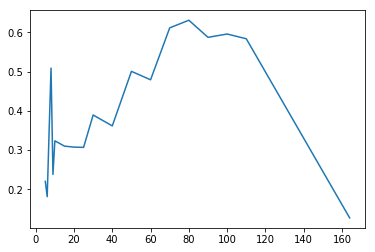

In [85]:
import numpy as np
import matplotlib.pyplot as plt
 
# 折れ線グラフを出力
left = np.array([5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50,60,70,80,90,100,110, 164])
height = np.array([0.219872, 0.180891, 0.347932, 0.508820, 0.237554, 0.323306, 0.309791, 0.307268, 0.306588, 0.389166,0.361399,0.500512,0.479017,0.611475,0.630875,0.587258,0.595756,0.583613,0.126656])
plt.plot(left, height)

# 特徴量からtestで分散0を除き、標準化したとき3~-3から外れるものを除去

In [107]:
train_data = np.loadtxt("furukawa_残基毎_標準化なし_rank順_名前なし.csv",delimiter=",",dtype=float)
train=train_data[:,0:164]

test_data = np.loadtxt('wang_残基毎_標準化なし_rank順_名前なし.csv', delimiter=',', dtype=float)
test = test_data[:,0:164]

scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

f=open("外れ値_残基毎.csv","w")

for i in range(len(test)):
    for j in range(164):
        if(test[i][j] > 3 or test[i][j] < -3):
            f.write(str(i))
            f.write(",")
            f.write(str(j))
            f.write("\n")
f.close()

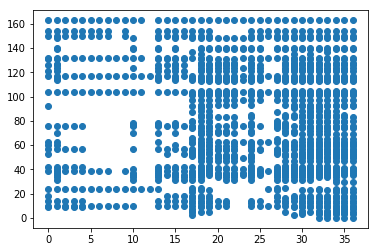

In [108]:
data = np.loadtxt('外れ値_残基毎.csv', delimiter=',', dtype=float)

num = data[:,0:1]
label = data[:,1]
plt.scatter(num,label)

In [109]:
label

array([  9.,  10.,  14., ..., 150., 154., 163.])

In [110]:
val = list(set(label))

In [111]:
val = np.sort(val)

In [112]:
val

array([  0.,   2.,   3.,   5.,   6.,   7.,   9.,  10.,  12.,  14.,  16.,
        17.,  18.,  21.,  23.,  24.,  25.,  30.,  31.,  34.,  35.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  47.,  49.,  50.,  51.,
        52.,  53.,  54.,  55.,  56.,  57.,  59.,  60.,  62.,  63.,  65.,
        66.,  69.,  70.,  72.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
        83.,  84.,  85.,  87.,  88.,  91.,  92.,  93.,  97., 101., 102.,
       104., 105., 113., 114., 115., 117., 121., 122., 124., 125., 126.,
       127., 128., 130., 131., 132., 135., 137., 139., 140., 148., 150.,
       154., 163.])

In [100]:
val = np.array([  0.,   2.,   3.,   5.,   6.,   7.,   9.,  10.,  12.,  14.,  16.,
        17.,  18.,  21.,  23.,  24.,  25.,  30.,  31.,  34.,  35.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  47.,  49.,  50.,  51.,
        52.,  53.,  54.,  55.,  56.,  57.,  59.,  60.,  62.,  63.,  65.,
        66.,  69.,  70.,  72.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
        83.,  84.,  85.,  87.,  88.,  91.,  92.,  93.,  97., 101., 102.,
       104., 105., 113., 114., 115., 117., 119., 121., 122., 124., 125., 126.,
       127., 128., 130., 131., 132., 134., 135., 136., 137., 139., 140., 146., 147., 148., 150.,
       154.,156,158,159,160,162,163])

In [101]:
len(val)

100

In [99]:
train_data = np.loadtxt("furukawa_残基毎_標準化なし_rank順_名前なし.csv",delimiter=",",dtype=float)
test_data = np.loadtxt('wang_残基毎_標準化なし_rank順_名前なし.csv', delimiter=',', dtype=float)
oi=[]
for i in range(164):
    train = train_data[:,i]
    test = test_data[:,i]
    
    train_ave=sum(train)/len(train)
    test_ave=sum(test)/len(test)
    
    for j in range(len(train)):
        train_std=(((train_ave - train[j])**2)/len(train))**0.5
    for j in range(len(test)):
        test_std=(((test_ave - test[j])**2)/len(test))**0.5
    
    if(test_std==0):
        print(i)

119
134
136
146
147
156
158
159
160
162


In [105]:
len(val)

100

In [104]:
index = list(np.array(range(165)))
for i in range(len(val)):
    index.remove(val[i])

In [106]:
train_data = np.loadtxt("furukawa_残基毎_標準化なし_rank順_名前付き.csv",delimiter=",",dtype=str)
train=train_data[:,0:]

test_data = np.loadtxt('wang_残基毎_標準化なし_rank順_名前付き.csv', delimiter=',', dtype=str)
test = test_data[:,0:]

file=open("FURUKAWA_残基毎_rank_名前.csv","w")
file2=open("WANG_残基毎_rank_名前.csv","w")

for i in range(394):
    for j in range(len(index)):
        if(j==(len(index)-1)):
            file.write(train[i][index[j]])
            file.write("\n")
        else:    
            file.write(train[i][index[j]])
            file.write(",")
file.close()

for i in range(38):
    for j in range(len(index)):
        if(j==(len(index)-1)):
            file2.write(test[i][index[j]])
            file2.write("\n")
        else:
            file2.write(test[i][index[j]])
            file2.write(",")
file2.close()

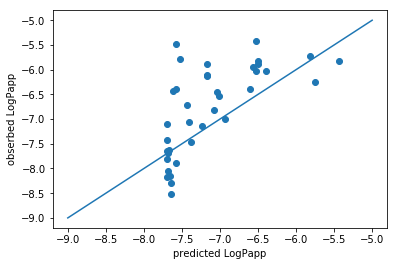

SVR: r2 0.280666, RMSE 0.753575, r 0.660887


In [38]:
train_data = np.loadtxt("furukawa_残基毎_標準化なし_rank順_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:164]
train_label=train_data[:,-1]
test_data = np.loadtxt('wang_残基毎_標準化なし_rank順_名前なし.csv', delimiter=',', dtype=float)
test_feature = test_data[:, 0:164]
test_label = test_data[:, -1] 

train_feature=feature_std_delite(train_feature,oi)
test_feature=feature_std_delite(test_feature,oi)

scaler = StandardScaler()
scaler.fit(train_feature)
train_feature = scaler.transform(train_feature)
test_feature = scaler.transform(test_feature)

tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]

grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
grid.fit(train_feature,train_label)
    
clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
clf.fit(train_feature, train_label)
pred = clf.predict(test_feature)

R2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5
r = r_calc(test_label,pred)

x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed LogPapp')
plt.xlabel('predicted LogPapp')
plt.show()
print ("SVR: r2 %f, RMSE %f, r %f" % (R2, rmse, r))

# 特徴量の数を変えてのR2の変化を見る

In [33]:
prediction(164)

0.12665612965881679

In [30]:
def prediction(x):
    tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
    train_data = np.loadtxt("furukawa_残基毎_標準化なし_rank順_名前なし.csv",delimiter=",",dtype=float)
    train_feature=train_data[:,0:x]
    train_label=train_data[:,-1]
    
    test_data = np.loadtxt('wang_残基毎_標準化なし_rank順_名前なし.csv', delimiter=',', dtype=float)
    test_feature = test_data[:, 0:x]
    test_label = test_data[:, -1] 

    scaler = StandardScaler()
    scaler.fit(train_feature)
    train_feature = scaler.transform(train_feature)
    test_feature = scaler.transform(test_feature)

    grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
    grid.fit(train_feature,train_label)
    
    clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
    clf.fit(train_feature, train_label)
    pred = clf.predict(test_feature)

    R2 = r2_score(test_label,pred)
    return R2

In [32]:
left,height

(array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
         60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.,
        115., 120., 125., 130., 135., 140., 145., 150., 155., 160.]),
 array([0.21987184, 0.24062802, 0.31735777, 0.27736411, 0.25543389,
        0.38916589, 0.33743842, 0.29436621, 0.42630489, 0.52526711,
        0.48406599, 0.47719409, 0.45684882, 0.60076869, 0.55968636,
        0.50224148, 0.48966093, 0.48900861, 0.54592638, 0.5762829 ,
        0.57857083, 0.58358115, 0.58578977, 0.57973981, 0.57461616,
        0.57563324, 0.3044331 , 0.27572085, 0.27301034, 0.42317438,
        0.27825248, 0.22665152]))

# 新たな試み

In [44]:
def std_prediction(x):
    tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
    train_data = np.loadtxt("furukawa_残基毎_標準偏差_rank_名前なし.csv",delimiter=",",dtype=float)
    train_feature=train_data[:,0:x]
    train_label=train_data[:,-1]
    
    test_data = np.loadtxt('wang_残基毎_標準偏差_rank_名前なし.csv', delimiter=',', dtype=float)
    test_feature = test_data[:, 0:x]
    test_label = test_data[:, -1] 

    scaler = StandardScaler()
    scaler.fit(train_feature)
    train_feature = scaler.transform(train_feature)
    test_feature = scaler.transform(test_feature)

    grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
    grid.fit(train_feature,train_label)
    
    clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
    clf.fit(train_feature, train_label)
    pred = clf.predict(test_feature)

    R2 = r2_score(test_label,pred)
    return R2

In [51]:
new_left

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.,
       115., 120., 125., 130., 135., 140., 145., 150.])

In [52]:
new_height

array([0.21987184, 0.24062802, 0.31735777, 0.27736411, 0.25543389,
       0.38916589, 0.33743842, 0.29436621, 0.42630489, 0.53254306,
       0.49887314, 0.49326179, 0.67208765, 0.66764187, 0.63489343,
       0.57883386, 0.57422332, 0.58445314, 0.61279302, 0.60764409,
       0.60242344, 0.60061033, 0.60729599, 0.60071312, 0.73179367,
       0.29816323, 0.2811524 , 0.2820783 , 0.29779789, 0.28066559])

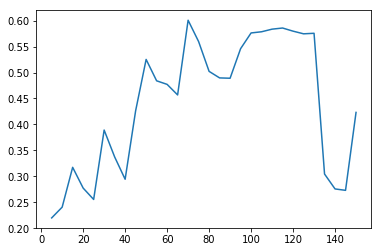

In [49]:
plt.plot(new_left,new_height)

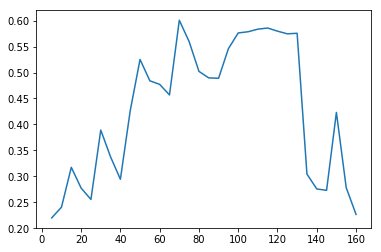

In [31]:
#普通にやったもの
left = np.zeros(32)
height = np.zeros(32)
for i in range(32):
    left[i] = 5*(i+1)
    height[i] = prediction(5*(i+1))
plt.plot(left,height)

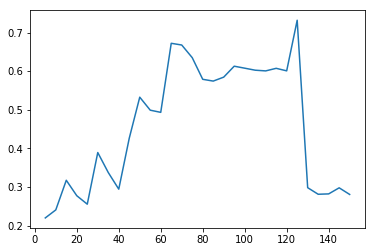

In [50]:
#標準偏差100倍異なるものを除去
new_left = np.zeros(30)
new_height = np.zeros(30)
for i in range(30):
    new_left[i] = 5*(i+1)
    new_height[i] = std_prediction(5*(i+1))
plt.plot(new_left,new_height)

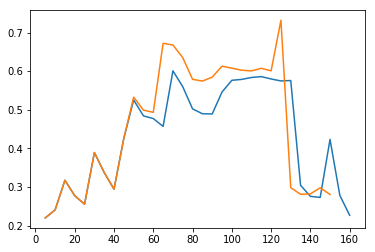

In [53]:
plt.plot(left,height)
plt.plot(new_left,new_height)